Copyright 2021 University of San Andres' Authors.

In [5]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [6]:
#@title MIT License
#
# Copyright (c) 2021 University of San Andres
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Entrená tu primer red neuronal: clasificación MNIST

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Importá el set de datos MNIST

Este tutorial usa el conjunto de datos más famoso conocido como [MNIST](http://yann.lecun.com/exdb/mnist). Éste contiene 60.000 imágenes de números a mano alzada, en escala de grises, y un conjunto de datos de prueba de 10.000 ejemplos. Cada imagen son de baja resolución (28x28 pixels) como se ve aquí:

<table>
  <tr><td>
    <img src="images/mnist-dataset.png"
         alt="MNIST Sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1.</b> <a href="http://yann.lecun.com/exdb/mnist">Muestras MNIST</a><br/>&nbsp;
  </td></tr>
</table>

MNIST es un conjunto de datos utilizado como el "Hola, Mundo!" de Machine Learning para Visión por Computadoras. MNIST contiene imágenes a mano alzada desde el 0 al 9 de baja resolución.

Existen otro tipo de conjunto de datos basados en este llamado [Fashion MNIST](), los cuales funcionan como punta pie inicial para verificar que el desarrollo de algoritmos funcionan. Sirven generalemente para hacer pruebas y refinamiento de los algoritmos en cuestión. 

Utilizaremos 60.000 imágenes para entrenar una red neuronal y 10.000 imágenes para analizar la exactitud de la red para clasificar cada una de las imágenes. Se utilizará TensorFlow para acceder directamente al conjunto de datos de manera muy práctica.

In [9]:
fashion_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
class_names = [
    'Zero', 'One', 'Two',
    'Three', 'Four', 'Five',
    'Six', 'Seven', 'Eight',
    'Nine'
]

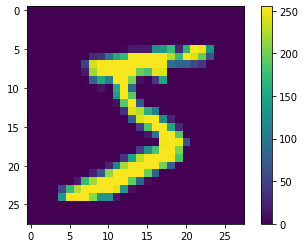

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

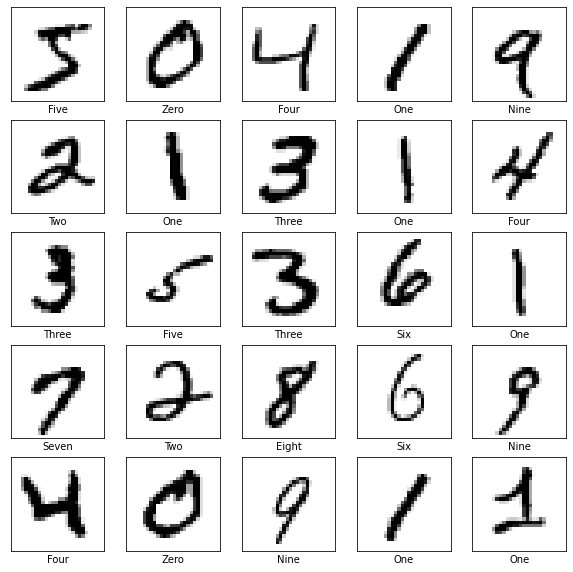

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2682 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1173 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0794 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0605 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0462 - accuracy: 0.9856


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 0.9761
Test accuracy: 0.9761000275611877


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([3.6470997e-09, 1.3025334e-09, 5.2026394e-06, 4.2267420e-05,
       1.5535895e-11, 3.6960080e-07, 1.0446907e-12, 9.9994957e-01,
       7.4853119e-07, 1.7173802e-06], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

In [24]:
test_labels[0]

7

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

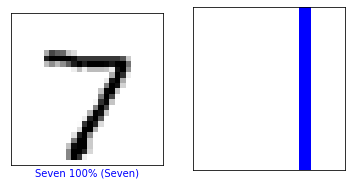

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

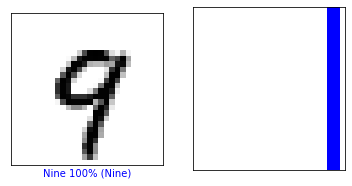

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

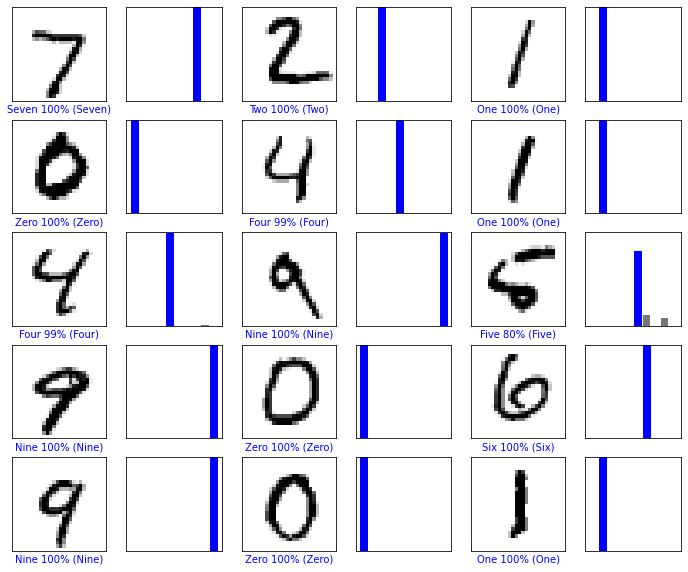

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.6470997e-09 1.3025334e-09 5.2026344e-06 4.2267380e-05 1.5535895e-11
  3.6960043e-07 1.0446907e-12 9.9994957e-01 7.4852977e-07 1.7173802e-06]]


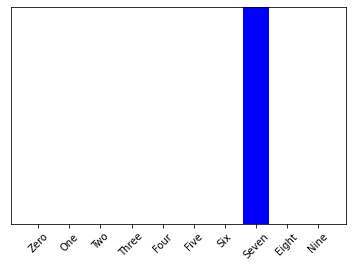

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

7